In [8]:
!pip install scikit-learn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [11]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([5, 20, 14, 32, 22, 38])

print(X, X.shape)
print(y, y.shape)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] (6, 1)
[ 5 20 14 32 22 38] (6,)


In [12]:
# define / instantiate model
model = LinearRegression()

In [13]:
model

LinearRegression()

In [14]:
# train / fit the model
model.fit(X,y)

LinearRegression()

In [15]:
r2 = model.score(X,y)
print("R-square:", r2)

R-square: 0.7158756137479542


In [16]:
print("intercept:", model.intercept_)
print("coefficient:", model.coef_)

intercept: 5.633333333333329
coefficient: [0.54]


In [19]:
y_pred = model.predict(X)
print("data X:", X.flatten())
print("true y:", y)
print("pred y:", y_pred)

data X: [ 5 15 25 35 45 55]
true y: [ 5 20 14 32 22 38]
pred y: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [22]:
model.predict([[5], [15], [25], [35], [45], [55]])

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

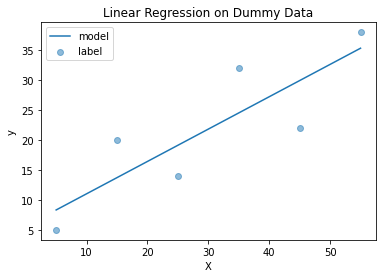

In [21]:
plt.scatter(X, y, alpha=.5, label="label")
plt.plot(X, y_pred, label="model")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression on Dummy Data")
plt.legend()
plt.show()

## Multiple Linear Regression

In [23]:
X = np.array([[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]])
y = np.array([4, 5, 20, 14, 32, 22, 38, 43])

print(X, X.shape)
print(y, y.shape)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] (8, 2)
[ 4  5 20 14 32 22 38 43] (8,)


In [24]:
# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)
y_pred = model.predict(X)

# calculate r-square
r2 = model.score(X, y)

print("X:", X, sep="\n")
print("true y:", y)
print("pred y:", y_pred)
print("r2 score:", r2)

X:
[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
true y: [ 4  5 20 14 32 22 38 43]
pred y: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]
r2 score: 0.8615939258756775


In [27]:
print("intercept:", model.intercept_)
print("coefficient:", model.coef_)
print("Prediction:", (model.intercept_ + np.dot(X, model.coef_)))

intercept: 5.52257927519819
coefficient: [0.44706965 0.25502548]
Prediction: [ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [30]:
new_X = np.arange(10).reshape((-1, 2))
print("Test X:", new_X)
print("Predictions:", model.predict(new_X))

Test X: [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
Predictions: [ 5.77760476  7.18179502  8.58598528  9.99017554 11.3943658 ]


## Polynomial Regression

In [36]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1,1))
y = np.array([15, 11, 2, 8, 25, 32])

print(X, X.shape)
print(y, y.shape)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]] (6, 1)
[15 11  2  8 25 32] (6,)


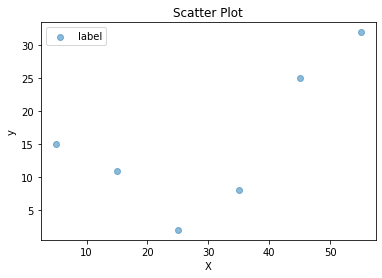

In [37]:
plt.scatter(X, y, alpha=.5, label="label")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot")
plt.legend()
plt.show()

In [48]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_X = poly.fit_transform(X)
poly_X

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [45]:
# define the model
model = LinearRegression()

# fit the model
model.fit(poly_X, y)
y_pred = model.predict(poly_X)

# calculate r-square
r2 = model.score(poly_X, y)

print("X:", X.flatten())
print("polynomial features of X:", poly_X, sep="\n")
print("true y:", y)
print("pred y:", y_pred)
print("r2 score:", r2)

X: [ 5 15 25 35 45 55]
polynomial features of X:
[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]
true y: [15 11  2  8 25 32]
pred y: [15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]
r2 score: 0.8908516262498563


In [47]:
print("intercept:", model.intercept_)
print("coefficient:", model.coef_)

intercept: 21.37232142857144
coefficient: [-1.32357143  0.02839286]


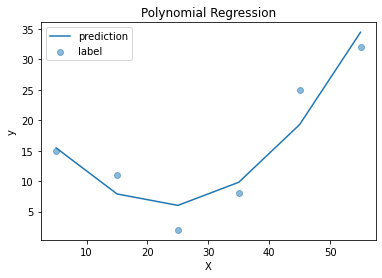

In [46]:
plt.scatter(X, y, alpha=.5, label="label")
plt.plot(X, y_pred, label="prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

## Statsmodels Linear Regression on Boston House Pricing Dataset

In [50]:
boston = load_boston()

In [52]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [55]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [56]:
df_target = pd.DataFrame(boston.target, columns=["MEDV"])
df_target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [61]:
X = df_boston[["RM"]]
y = df_target["MEDV"]

In [65]:
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):                   3.74e-256
Time:                        21:43:15   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

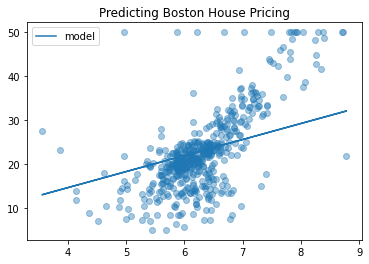

In [67]:
plt.scatter(X, y, alpha=.4)
plt.plot(X, predictions, label="model")
plt.title("Predicting Boston House Pricing")
plt.legend()
plt.show()

In [68]:
pd.concat([df_boston, df_boston], axis=0).shape

(1012, 13)